# Plot the AR6 SSP ERF time series 1750-2500

Theme Song: Endless Ways<br>
Artist: Anathema<br>
Album: The Optimist<br>
Released: 2017

In [1]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from matplotlib import gridspec, rc

In [2]:
pl.rcParams['figure.figsize'] = (18/2.54, 22/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True

In [3]:
scenarios = ['ssp119','ssp126','ssp245','ssp370','ssp370-lowNTCF','ssp370-lowNTCFCH4','ssp434','ssp460','ssp534-over','ssp585']

In [4]:
# put in a module

colors = {
    'ssp119': '#1e9583',
    'ssp126': '#1d3354',
    'ssp245': '#e9dc3d',
    'ssp370': '#f11111',
    'ssp370-lowNTCF': '#f11111',
    'ssp370-lowNTCFCH4': '#f11111',
    'ssp434': '#63bce4',
    'ssp460': '#e78731',
    'ssp534-over': '#996dc8',
    'ssp585': '#830b22',
}

ls = {
    'ssp119': '-',
    'ssp126': '-',
    'ssp245': '-', 
    'ssp370': '-',
    'ssp370-lowNTCF': '--',
    'ssp370-lowNTCFCH4': ':',
    'ssp434': '-',
    'ssp460': '-',
    'ssp534-over': '-',
    'ssp585': '-',
}

In [5]:
forcing = {}
forcing_p05 = {}
forcing_p95 = {}

for scenario in scenarios:
    forcing[scenario] = pd.read_csv('../data_output/SSPs/ERF_%s_1750-2500.csv' % scenario)
    forcing_p05[scenario] = pd.read_csv('../data_output/SSPs/ERF_%s_1750-2500_pc05.csv' % scenario)
    forcing_p95[scenario] = pd.read_csv('../data_output/SSPs/ERF_%s_1750-2500_pc95.csv' % scenario)

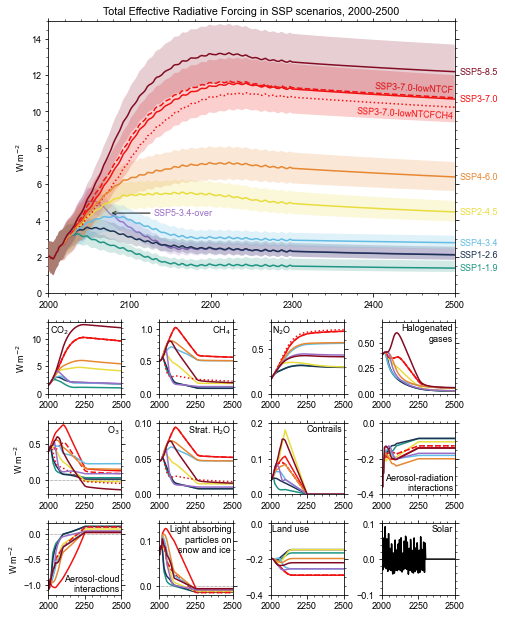

In [19]:
pl.figure()
gs = gridspec.GridSpec(6,4)
ax_main = pl.subplot(gs[0:3, 0:])

for scenario in scenarios:
    if scenario=='ssp534-over':
        zorder=3
    else:
        zorder=4
    if 'lowNTCF' not in scenario:
        ax_main.fill_between(np.arange(1750, 2501), forcing_p05[scenario]['total'], forcing_p95[scenario]['total'], color=colors[scenario], lw=0, alpha=0.2, zorder=zorder)
    ax_main.plot(np.arange(1750,2501), forcing[scenario]['total'], label=scenario, color=colors[scenario], ls=ls[scenario], zorder=zorder)
ax_main.set_ylim(0,15)
ax_main.set_xlim(2000,2500)
#ax_main.legend()
ax_main.set_title('Total Effective Radiative Forcing in SSP scenarios, 2000-2500')
ax_main.set_ylabel('W m$^{-2}$')

ax_co2 = pl.subplot(gs[3, 0])
ax_ch4 = pl.subplot(gs[3, 1])
ax_n2o = pl.subplot(gs[3, 2])
ax_oth = pl.subplot(gs[3, 3])
ax_ozo = pl.subplot(gs[4, 0])
ax_h2o = pl.subplot(gs[4, 1])
ax_con = pl.subplot(gs[4, 2])
ax_ari = pl.subplot(gs[4, 3])
ax_aci = pl.subplot(gs[5, 0])
ax_bcs = pl.subplot(gs[5, 1])
ax_lnd = pl.subplot(gs[5, 2])
ax_nat = pl.subplot(gs[5, 3])

ax_bcs.axhline(0, ls=':', color='k', lw=0.5)
ax_aci.axhline(0, ls=':', color='k', lw=0.5)
ax_ozo.axhline(0, ls=':', color='k', lw=0.5)


for scenario in scenarios:
    ax_co2.plot(np.arange(1750,2501),forcing[scenario]['co2'], color=colors[scenario], ls=ls[scenario])
    ax_ch4.plot(np.arange(1750,2501),forcing[scenario]['ch4'], color=colors[scenario], ls=ls[scenario])
    ax_n2o.plot(np.arange(1750,2501),forcing[scenario]['n2o'], color=colors[scenario], ls=ls[scenario])
    ax_oth.plot(np.arange(1750,2501),forcing[scenario]['other_wmghg'], color=colors[scenario], ls=ls[scenario])
    ax_ozo.plot(np.arange(1750,2501),forcing[scenario]['o3'], color=colors[scenario], ls=ls[scenario])
    ax_h2o.plot(np.arange(1750,2501),forcing[scenario]['h2o_stratospheric'], color=colors[scenario], ls=ls[scenario])
    ax_con.plot(np.arange(1750,2501),forcing[scenario]['contrails'], color=colors[scenario], ls=ls[scenario])
    ax_ari.plot(np.arange(1750,2501),forcing[scenario]['aerosol-radiation_interactions'], color=colors[scenario], ls=ls[scenario])
    ax_aci.plot(np.arange(1750,2501),forcing[scenario]['aerosol-cloud_interactions'], color=colors[scenario], ls=ls[scenario])
    ax_bcs.plot(np.arange(1750,2501),forcing[scenario]['bc_on_snow'], color=colors[scenario], ls=ls[scenario])
    ax_lnd.plot(np.arange(1750,2501),forcing[scenario]['land_use'], color=colors[scenario], ls=ls[scenario])
#ax_nat.plot(np.arange(1750,2501),forcing[scenario]['volcanic'], color='k', ls=ls[scenario])
ax_nat.plot(np.arange(1750,2501),forcing[scenario]['solar'], color='k', ls=ls[scenario])

ax_co2.set_xlim(2000, 2500)
ax_ch4.set_xlim(2000, 2500)
ax_n2o.set_xlim(2000, 2500)
ax_oth.set_xlim(2000, 2500)
ax_ozo.set_xlim(2000, 2500)
ax_h2o.set_xlim(2000, 2500)
ax_con.set_xlim(2000, 2500)
ax_ari.set_xlim(2000, 2500)
ax_aci.set_xlim(2000, 2500)
ax_bcs.set_xlim(2000, 2500)
ax_lnd.set_xlim(2000, 2500)
ax_nat.set_xlim(2000, 2500)

ax_co2.set_ylim(0, 13)
ax_ch4.set_ylim(0, 1.1)
ax_n2o.set_ylim(0, 0.8)
ax_oth.set_ylim(0, 0.7)
ax_ozo.set_ylim(-0.2, 0.8)
ax_h2o.set_ylim(0, 0.1)
ax_con.set_ylim(0, 0.2)
ax_ari.set_ylim(-0.4, 0)
ax_aci.set_ylim(-1.2, 0.2)
ax_bcs.set_ylim(-0.02, 0.14)
ax_lnd.set_ylim(-0.4, 0)
ax_nat.set_ylim(-0.1, 0.1)

ax_co2.text(0.02, 0.98, 'CO$_2$', va='top', ha='left', transform=ax_co2.transAxes)
ax_ch4.text(0.98, 0.98, 'CH$_4$', va='top', ha='right', transform=ax_ch4.transAxes)
ax_n2o.text(0.02, 0.98, 'N$_2$O', va='top', ha='left', transform=ax_n2o.transAxes)
ax_oth.text(0.98, 0.98, 'Halogenated\ngases', va='top', ha='right', transform=ax_oth.transAxes)
ax_ozo.text(0.98, 0.98, 'O$_3$', va='top', ha='right', transform=ax_ozo.transAxes)
ax_h2o.text(0.98, 0.98, 'Strat. H$_2$O', va='top', ha='right', transform=ax_h2o.transAxes)
ax_con.text(0.98, 0.98, 'Contrails', va='top', ha='right', transform=ax_con.transAxes)
ax_ari.text(0.98, 0.02, 'Aerosol-radiation\ninteractions', va='bottom', ha='right', transform=ax_ari.transAxes)
ax_aci.text(0.98, 0.02, 'Aerosol-cloud\ninteractions', va='bottom', ha='right', transform=ax_aci.transAxes)
ax_bcs.text(0.98, 0.98, 'Light absorbing\nparticles on\nsnow and ice', va='top', ha='right', transform=ax_bcs.transAxes)
ax_lnd.text(0.02, 0.98, 'Land use', va='top', ha='left', transform=ax_lnd.transAxes)
ax_nat.text(0.98, 0.98, 'Solar', va='top', ha='right', transform=ax_nat.transAxes)

ax_co2.set_ylabel('W m$^{-2}$')
ax_ozo.set_ylabel('W m$^{-2}$')
ax_aci.set_ylabel('W m$^{-2}$')

ax_main.text(2506, forcing['ssp585']['total'][750], 'SSP5-8.5', color=colors['ssp585'], va='center', ha='left')
ax_main.text(2506, forcing['ssp370']['total'][750], 'SSP3-7.0', color=colors['ssp370'], va='center', ha='left')
ax_main.text(2499, forcing['ssp370-lowNTCF']['total'][750]+.2, 'SSP3-7.0-lowNTCF', color=colors['ssp370'], va='bottom', ha='right', rotation=-3)
ax_main.text(2499, forcing['ssp370-lowNTCFCH4']['total'][750]+0.05, 'SSP3-7.0-lowNTCFCH4', color=colors['ssp370'], va='top', ha='right', rotation=-3)
ax_main.text(2506, forcing['ssp460']['total'][750], 'SSP4-6.0', color=colors['ssp460'], va='center', ha='left')
ax_main.text(2506, forcing['ssp245']['total'][750], 'SSP2-4.5', color=colors['ssp245'], va='center', ha='left')
ax_main.text(2506, forcing['ssp434']['total'][750], 'SSP4-3.4', color=colors['ssp434'], va='center', ha='left')
#ax_main.text(2499, forcing['ssp534-over']['total'][700], 'SSP5-3.4-over', color=colors['ssp534-over'], va='bottom', ha='right')
ax_main.text(2506, forcing['ssp126']['total'][750], 'SSP1-2.6', color=colors['ssp126'], va='center', ha='left')
ax_main.text(2506, forcing['ssp119']['total'][750], 'SSP1-1.9', color=colors['ssp119'], va='center', ha='left')
ax_main.annotate('SSP5-3.4-over', arrowprops={'arrowstyle':'->'}, xy=(2075, forcing['ssp534-over']['total'][325]), xytext=(2130, forcing['ssp534-over']['total'][325]), color=colors['ssp534-over'], va='center')
#ax_main.annotate('ssp370-lowNTCFCH4', arrowprops={'arrowstyle':'->'}, xy=(2400, forcing['ssp370-lowNTCFCH4']['total'][650]), xytext=(2400, 9), color=colors['ssp370-lowNTCFCH4'], va='center', ha='center')
#ax_main.annotate('ssp370-lowNTCF', arrowprops={'arrowstyle':'->'}, xy=(2100, forcing['ssp370-lowNTCF']['total'][350]), xytext=(2050, 12), color=colors['ssp370-lowNTCF'], va='center', ha='center')


pl.tight_layout()
pl.savefig('../figures/fig7.SM.1.png', dpi=300)
pl.savefig('../figures/fig7.SM.1.pdf')
#pl.savefig('/nfs/see-fs-02_users/mencsm/ssp_erf/total.png')